Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
1st Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **TITLE**
**Name** | LastName, FirstName
**Section** | CPE31Sx
**Date Performed**: |
**Date Submitted**: |
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [1]:
pip install opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import os
import cv2

def read_images(path):
    X, y = [], []
    label = 0  # Start labeling from 0

    for person in sorted(os.listdir(path)):  # Sort to ensure consistent labeling
        person_path = os.path.join(path, person)
        if not os.path.isdir(person_path):
            continue  # Skip files, only process directories

        for filename in os.listdir(person_path):
            img_path = os.path.join(person_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale

            if img is None:
                print(f"Could not read {img_path}, skipping.")
                continue

            img = cv2.resize(img, (200, 200))  # Resize for consistency
            X.append(np.asarray(img, dtype=np.uint8))
            y.append(label)

        label += 1  # Move to the next person

    return np.array(X), np.array(y)

if __name__ == "__main__":
    dataset_path = r'C:\Users\Keith\Documents\Activity 7. Performing Face Recognition\image_train'
    X, y = read_images(dataset_path)

    print(f"Loaded {len(X)} images with {len(set(y))} unique labels.")


Loaded 4 images with 2 unique labels.


In [ ]:
import numpy as np
import cv2
import sys
from read_images import read_images  # Import function from the first script

def face_rec():
    names = ['Keith', 'Monic']  # Change these to actual names

    dataset_path = "dataset"  # Change if needed
    X, y = read_images(dataset_path)
    y = np.asarray(y, dtype=np.int32)

    model = cv2.face.EigenFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(0)  # Open webcam
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face = gray[y:y + h, x:x + w]
            face_resized = cv2.resize(face, (200, 200))

            try:
                label, confidence = model.predict(face_resized)
                label_name = names[label] if label < len(names) else "Unknown"
                cv2.putText(img, f"{label_name}, {confidence:.2f}", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except:
                continue

        cv2.imshow("Face Recognition", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()


In [ ]:
python face_recognition.py

In [ ]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

In [ ]:
imgs = r'C:\Users\Keith\Documents\Activity 7. Performing Face Recognition\image_train'
read_images(imgs, sz=None)

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [ ]:
def face_rec():
  names = ['Friend1', 'Friend2'] # Put your names here for faces to recognize
  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images(sys.argv[1])
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.EigenFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(0)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()


In [ ]:
import cv2
import numpy as np
import os

def read_images(path, size):
    X, y = [], []
    label_map = {}
    current_label = 0

    for dirname, _, filenames in os.walk(path):
        folder_name = os.path.basename(dirname)
        if folder_name not in label_map:
            label_map[folder_name] = current_label
            current_label += 1

        for filename in filenames:
            if filename.endswith('.jpg') or filename.endswith('.png'):
                filepath = os.path.join(dirname, filename)
                img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    print(f"Warning: Unable to read image {filepath}")
                    continue
                img = cv2.resize(img, size)
                X.append(np.asarray(img, dtype=np.uint8))
                y.append(label_map[folder_name]) 

    return np.asarray(X), np.asarray(y)

def face_rec():
    names = ['Friend', 'Keith']  # Ensure this matches the folder names
    X, y = read_images(imgs, (200, 200))
    y = np.asarray(y, dtype=np.int32)
    model = cv2.face.EigenFaceRecognizer_create()
    model.train(X, y)
    camera = cv2.VideoCapture(0)
    face_cascade = cv2.CascadeClassifier(r'C:\Users\Keith\Documents\Activity 7. Performing Face Recognition\haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)
            roi = roi.astype(np.uint8)

            try:
                params = model.predict(roi)
                print("Predicted:", params[0], "Confidence:", params[1])  # Debugging output
                if 3000 >= params[1]: 
                    label = names[params[0]]
                else:
                    label = 'Unknown'
                cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            except Exception as e:
                print("Error:", e)
                continue

        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    imgs = r'C:\Users\Keith\Documents\Activity 7. Performing Face Recognition\image_train'
    face_rec()

![Screenshot 2025-02-21 203154.png](<attachment:Screenshot 2025-02-21 203154.png>)
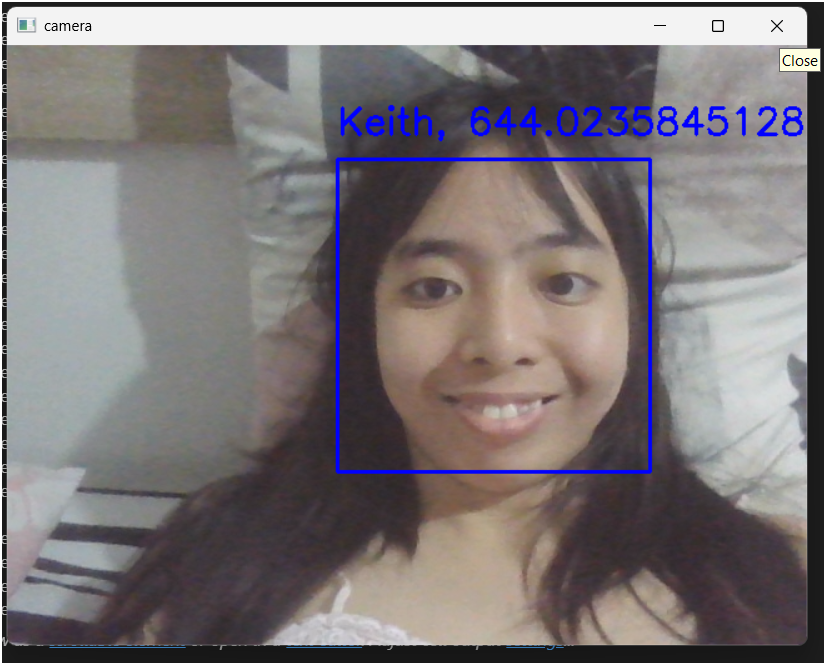

**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.createFisherFaceRecognizer()`
- `model = cv2.face.createLBPHFaceRecognizer()`

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important ince this application.**

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

## 5. Summary, Conclusions and Lessons Learned

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*